# **2 - Radiation lesson**

In this lesson we will run the radiation simulations.
- Skyview factor
- Shortwave radiation
- Clearness index
- Longwave radiation
- Net radiation
- Raster radiation (longwave only)

# **Shortwave radiation**
Complete documentation: https://osf.io/wcjqz/

<span style='color:red'>**WARNING: very time consuming simulation**</span>

### **Component Description**
The incident shortwave (S) on an arbitrary sloping surface in a point under cloudless sky conditions is given by:
\begin{equation}
S_{\downarrow} = C_{1}\cdot I_{sc} \cdot E_{0} \cdot cos(\theta_{s} ) \cdot (T_{s} + \beta_{s} ) \cdot \psi 
\end{equation}
in which:
- $C_{1} = 0.9751$ is the fraction of solar radiation that is included between 0.3 and 3.0 μm wavelengths;
- $E_{0}$ [–] is a correction factor related to Earth’s orbit eccentricity computed according to Spencer (1971);
- $T_{s}$ [–] is the product of the atmospheric transmittance:
\begin{equation}
T_{s} = \tau_{r} \cdot \tau_{0} \cdot \tau_{g} \cdot \tau_{w} \cdot \tau_{a} 
\end{equation}
where the $\tau$ functions are the transmittance functions for Rayleigh scattering, ozone, uniformly mixed gases, water vapor, and aerosols, respectively;
- $\beta_{s}$ [m] is a correction factor for increased transmittance with elevation z[m] defined according to Corripio (2002);
- $\theta_{s}$ [rad] is the angle between the Sun vector and the surface plane;
- $\psi$ is the shadows index that accounts for the sun or shadow of the point under analysis. 

The modeling of the diffuse component of solar radiation, $d_{\downarrow}$ , follows:
\begin{equation}
d_{\downarrow} = (d_{\downarrow r} + d_{\downarrow a} + d_{\downarrow m} ) · V_{s} ,
\end{equation}

where $d_{\downarrow r}, d_{\downarrow a}$ and $d_{\downarrow m}$ are the diffuse irradiance components after the first pass through the atmosphere due to the Rayleigh scattering, the aerosol scattering and multiple reflection,respectively.

Finally $V_{s}$ is the sky view factor, i.e., the fraction of sky visible in a point, computed using the algorithm presented in Corripio (2002).

### **Detailed Inputs description**
General description

The input file is a .csv file containing a header and one or more time series of input data, depending on the number of stations involved. Each column of the file is associated to a different station. 
The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- the fourth and fifth rows contain the IDs of the stations (e.g. station number 8: value 8, ID, ,8);
- the sixth row contains the information about the type of the input data (in this case, one column with the date and one column with double values);
- the seventh row specifies the date format (YYYY-MM-dd HH:mm).
All the previous information shown in the following figure:

In [9]:
from IPython.display import Image
import os

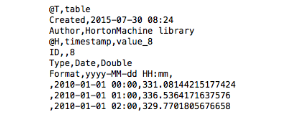

In [10]:
projFolder = '/home/drugo/Sim/OMS_Project_ET/'
os.chdir(projFolder)
Image('Images/header.png')

#### **Air temperature**
The air temperature is given in <span style='color:red'>**time series**</span> or <span style='color:red'>**raster maps**</span> of (°C) values. The conversion in (°K) is directly done by the component.
#### **Relative humidity measures**
The relative humidity is given in <span style='color:red'>**time series**</span> or <span style='color:red'>**raster maps**</span> of (%) values.
#### **DEM**
DEM is the <span style='color:red'>**digital elevation model**</span> of the HRU considered.
#### **Sky view factor**
The sky view factor is a <span style='color:red'>**raster map**</span> of adimensional values in the interval [0,1] at the given point. It is the fraction of visible sky in the upper hemisphere and it is obtained from the digital elevation model using the JGrasstools. 
#### **Current date**
The current date is given as a string <span style='color:red'>**parameter**</span> and is required to compute the correction factor related to Earth’s orbit eccentricity ($E_{0}$)
#### **Ozone layer thickness**
Ozone layer thickness is a double value <span style='color:red'>**parameter**</span> in (cm) and usually varies in the interval [0.4,0.6].
#### **Visibility**
Visibility is a double value <span style='color:red'>**parameter**</span> in (km) and it depends on aerosol attenuation. It usually varies in the interval [5,180] km.
#### **Albedo**
Albedo is the double value <span style='color:red'>**parameter**</span> of the ground albedo.
#### **Vector file containing the coordinates of the station**
This <span style='color:red'>**shapefile**</span> should contain all the information about the stations involved in the simulation. It is required to obtain the station IDs and to determine their coordinates. The name of the field containing the IDs of the stations must be specified as a string in the sim file at the field ”fStationid”

In [11]:
###########################
### SET THE FOLDER PATH ###
###########################
projFolder = '/home/drugo/Sim/OMS_Project_ET/'

In [20]:
# %load simulation/Radiation/ShortWave.sim
import static oms3.SimBuilder.instance as OMS3
def home = oms_prj
// start and end date of the simulation
def startDate	=	"2006-07-01 00:00"
def endDate		=	"2006-07-31 23:30"
OMS3.sim {
	resource "$oms_prj/lib"
	model(while : "reader_data_airT.doProcess"  ) {
		components {    
			"reader_data_airT"            		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"        
			"reader_data_RH"            		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"        
			"reader_dem"                  		"org.jgrasstools.gears.io.rasterreader.OmsRasterReader"     
			"reader_sky"                  		"org.jgrasstools.gears.io.rasterreader.OmsRasterReader"
			"vreader_station"             		"org.jgrasstools.gears.io.shapefile.OmsShapefileFeatureReader"
			"swrb"                        		"swrbPointCase.ShortwaveRadiationBalancePointCase"
			"writer_direct"               		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter" 
			"writer_diffuse"              		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter" 		
			"writer_topATM"						"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"         
			"writer_total"						"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"   
			}  
			parameter{   
				// parameters reader data input air temperature
				"reader_data_airT.idfield"		"ID"  
				"reader_data_airT.file"			"${home}/data/Temp.csv"
				"reader_data_airT.tStart"		"${startDate}"
				"reader_data_airT.tEnd"			"${endDate}"
				"reader_data_airT.tTimestep"	30
				"reader_data_airT.fileNovalue"	"-9999"                        
				
				// parameters reader data input relative humidity
				//"reader_data_RH.file"			"${home}/data/RH.csv"
				//"reader_data_RH.idfield"		"ID"  
				//"reader_data_RH.tStart"		"${startDate}"
				//"reader_data_RH.tEnd"			"${endDate}"
				//"reader_data_RH.tTimestep"	30
				//"reader_data_RH.fileNovalue"	"-9999"                        
				
				"reader_dem.file"				"${home}/data/dem.asc"		
				"reader_sky.file"				"${home}/output/Radiation/skyviewRaster.asc"
				"vreader_station.file"			"${home}/data/Stations.shp"               
				
				// name of the column in the shape file containing the ID of the station
				"swrb.fStationsid"				"ID" //<---- è giusto l'id? CONTROLLATE
				"swrb.tStartDate"				"${startDate}"   
				"swrb.doHourly"					true   //or false if daily        
				"swrb.pCmO3"					0.6		// parametri da letteratura
				"swrb.pAlphag"					0.9		// parametri da letteratura
				"swrb.pVisibility"				80		// parametri da letteratura				            
				// writer output paramters  
				"writer_direct.file"			"${home}/output/Radiation/ShortwaveDirect.csv" 
				"writer_direct.tStart"			"${startDate}"
				"writer_direct.fileNovalue"		"-9999"
				"writer_direct.tTimestep"		30				        				        
				// writer output paramters   
				"writer_diffuse.file"			"${home}/output/Radiation/ShortwaveDiffuse.csv" 
				"writer_diffuse.tStart"			"${startDate}"
				"writer_diffuse.fileNovalue"	"-9999"
				"writer_diffuse.tTimestep"		30                
				// writer output paramters    
				"writer_topATM.file"			"${home}/output/Radiation/ShortwaveTOA.csv" 
				"writer_topATM.tStart"			"${startDate}"
				"writer_topATM.fileNovalue"		"-9999"
				"writer_topATM.tTimestep"		30        
				// writer output paramters    
				"writer_total.file"			"${home}/output/Radiation/ShortwaveTotal.csv" 
				"writer_total.tStart"			"${startDate}"
				"writer_total.fileNovalue"		"-9999"
				"writer_total.tTimestep"		30        
				}
				connect {                 
					"reader_data_airT.outData"	"swrb.inTemperatureValues"
					//"reader_data_RH.outData"	"swrb.inHumidityValues"       
					"reader_dem.outRaster"		"swrb.inDem"    
					"reader_sky.outRaster"		"swrb.inSkyview"          
					"vreader_station.geodata"	"swrb.inStations"
					"swrb.outHMdirect"			"writer_direct.inData"
					"swrb.outHMdiffuse"			"writer_diffuse.inData"
					"swrb.outHMtopatm"			"writer_topATM.inData"
					"swrb.outHMtotal"			"writer_total.inData"
					}
			}
	}


SyntaxError: invalid syntax (<ipython-input-20-73fa6e6da11c>, line 2)

In [22]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Radiation/ShortWave.sim

build/ folder exists: project already built.
Reading coverage: dem.asc
Reading coverage: skyviewRaster.asc
Reading features from shapefile: Stations.shp
Finished.
Finished.
Finished.

*********************************
***     END OF SIMULATION     ***
*********************************



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
os.chdir(projFolder)

**Read the shortwave radiation results**

In [25]:
nameSWFile = 'output/Radiation/ShortwaveTotal.csv'

In [27]:
dfSw = pd.read_csv('output/Radiation/ShortwaveTotal.csv',
                 skiprows=6, sep=',', parse_dates=[0], 
                 na_values=-9999,usecols=[1,2])
dfSw.columns = ['Datetime','SW']
dfSw.index = dfSw['Datetime']
dfSw = dfSw.iloc[:,1:]
dfSw.head(3)

,SW
Datetime,
2006-07-01 00:00:00,0.0
2006-07-01 00:30:00,0.0
2006-07-01 01:00:00,0.0


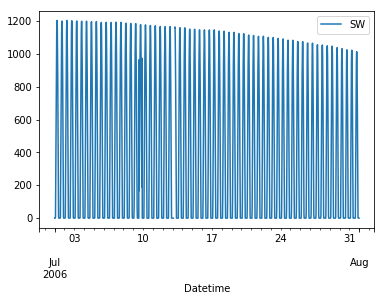

In [28]:
dfSw.plot()

This result does not consider the feedback/impact of clouds. To assess the effect of clouds we need to compare the theoretical shortwave radiation obtained with the shortwave.sim with the one measured in the station.
To do that we need the clearnessIndex.sim

## **Clearness Index**
Complete documentation: https://osf.io/vd7qh/

### **Component Description**
The clearness index is the ratio between the measured incoming solar radiation and the theoretical solar radiation computed at the top atmosphere. The index is needed to account for the cloudness for the simulation of the longwave radiation in all-sky conditions. Its dimensionless values varies between [0,1].
### **Detailed Inputs description**
#### **General description**
The input file is a .csv file containing a header and one or more time series of input data, depending on the number of stations involved. Each column of the file is associated to a different station. 
The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- The fourth and fifth rows contain the IDs of the stations (e.g. station number 8: value 8, ID, ,8);
- The sixth row contains the information about the type of the input data (in this case, one column with the date and one column with double values);
- The seventh row specifies the date format (YYYY-MM-dd HH:mm).
#### **Measured incoming solar radiation**
The measured incoming solar radiation should be given in <span style='color:red'>**time series**</span> or <span style='color:red'>**raster maps**</span> of ($W \cdot m^{−2}$) values for the investigated station.
#### **Top atmosphere solar radiation**
The theoretical solar radiation is computed at the top atmosphere and should be given in <span style='color:red'>**time series**</span> or <span style='color:red'>**raster maps**</span> of ($W \cdot m^{−2}$) values.

### **Detailed Outputs description**
Them output file will have exactly the same heading of the input file. 
#### **Time series of the Clearness index**
The Clearness index output is given as a <span style='color:red'>**time series**</span> at a given point or as <span style='color:red'>**raster maps**</span>. Its units are ($W \cdot m^{−2} / W \cdot m^{−2}$) and the values vary between 0 and 1. During night time the values are set equal to NA.

In [29]:
os.chdir(projFolder)

In [32]:
# %load simulation/Radiation/ClearnessIndex.sim
import static oms3.SimBuilder.instance as OMS3
def home = oms_prj

// start and end date of the simulation
def startDate	=	"2006-07-01 00:00"
def endDate		=	"2006-07-31 23:30"

OMS3.sim {

resource "$oms_prj/lib"

 model(while: "reader_data_SWRB_measured.doProcess" ) {
   components {
    
        // components: reader data input, clearness index and writer data output 
        "reader_data_SWRB_measured"            "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        "reader_data_SWRB_top"                 "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        "CI"                                   "clearnessIndex.ClearnessIndexPointCase"
        "writer_CI"                            "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter" 
            
         
   }

  
   parameter{
   
        // parameters reader data input SW measured 
        "reader_data_SWRB_measured.file"             "${home}/data/Temp.csv" 
        "reader_data_SWRB_measured.idfield"          "ID"  
        "reader_data_SWRB_measured.tStart"           "${startDate}"
        "reader_data_SWRB_measured.tEnd"             "${endDate}"
        "reader_data_SWRB_measured.tTimestep"          30
        "reader_data_SWRB_measured.fileNovalue"      "-9999"
        
        
        // parameters reader data input SW top  atmosphere
        "reader_data_SWRB_top.file"             "${home}/output/Radiation/ShortwaveTOA.csv" 
        "reader_data_SWRB_top.idfield"          "ID"  
        "reader_data_SWRB_top.tStart"           "${startDate}"
        "reader_data_SWRB_top.tEnd"             "${endDate}"
        "reader_data_SWRB_top.tTimestep"         30
        "reader_data_SWRB_top.fileNovalue"      "-9999"
   

            
        // parameters reader data input clearness index  
        "writer_CI.file"                   "${home}/output/Radiation/CI.csv" 
        "writer_CI.tStart"                 "${startDate}"
        "writer_CI.fileNovalue"			   "-9999"
        "writer_CI.tTimestep"              30
        

   }
    connect {
        
        "reader_data_SWRB_measured.outData"             "CI.inSWRBMeasuredValues"
        "reader_data_SWRB_top.outData"                  "CI.inSWRBTopATMValues"
        "CI.outCIHM"                                    "writer_CI.inData"

   }

 }
}




In [33]:
###########################
## Only for docker users ##
###########################
os.chdir(projFolder)
os.getcwd()

'/home/drugo/Sim/OMS_Project_ET'

In [35]:
###########################
## Only for docker users ##
###########################
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Radiation/ClearnessIndex.sim

build/ folder exists: project already built.

*********************************
***     END OF SIMULATION     ***
*********************************



**Display clearness index results**

In [36]:
nameCiFile = 'output/Radiation/CI.csv'

In [38]:
dfCi = pd.read_csv('output/Radiation/CI.csv',
                 skiprows=6, sep=',', parse_dates=[0], 
                 na_values=-9999,usecols=[1,2])
dfCi.columns = ['Datetime','CI']
dfCi.index = dfCi['Datetime']
dfCi = dfCi.iloc[:,1:]
dfCi.head(3)

,CI
Datetime,
2006-07-01 00:00:00,NaN
2006-07-01 00:30:00,NaN
2006-07-01 01:00:00,NaN


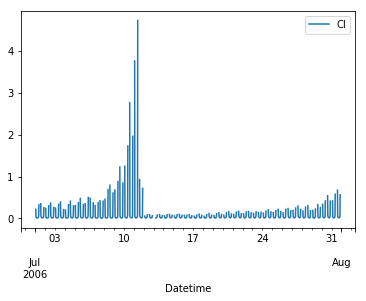

In [39]:
dfCi.plot()